In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Num GPUs Available:  1
Default GPU Device: /device:GPU:0


In [2]:
import os

print("Maligno: ", len(os.listdir("data/dataset_raw/MIAS/binary_classification/maligno")))
print("Benigno: ", len(os.listdir("data/dataset_raw/MIAS/binary_classification/benigno")))

Maligno:  52
Benigno:  63


Found 4321 images belonging to 2 classes.
Found 1079 images belonging to 2 classes.
(224, 224, 1)
1.0


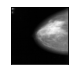

In [3]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=4,
    #     https://stackoverflow.com/questions/62484597/understanding-width-shift-range-and-height-shift-range-arguments-in-kerass
    #     width_shift_range = 0.05,
    #     height_shift_range = 0.05,
    # horizontal_flip=True,
    # https://stackoverflow.com/questions/57301330/what-exactly-the-shear-do-in-imagedatagenerator-of-keras
    # shear_range=2,
    #     preprocessing_function=gray_to_rgb,
    # zoom_range=[0.3, 0.5],
    validation_split=0.2  #20% para pruebas
)
# data/dataset_raw/MINI-DDSM/binary_classification/
#Generadores para sets de entrenamiento y pruebas
data_gen_train = datagen.flow_from_directory('data/dataset_raw/MINI-DDSM/binary_classification/',
                                             batch_size=32, shuffle=True, target_size=(224, 224),
                                             class_mode='binary',
                                             subset='training', color_mode="grayscale")
# color_mode='grayscale'
data_gen_test = datagen.flow_from_directory('data/dataset_raw/MINI-DDSM/binary_classification/',
                                            batch_size=32, target_size=(224, 224), shuffle=True,
                                            class_mode='binary',
                                            subset='validation',color_mode="grayscale")

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_train:
    for i in range(10):
        print(imagen[i].shape)
        print(etiqueta[i])
        plt.subplot(2, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen[i],cmap='gray')
        break
    break
plt.show()


In [4]:
from src.models.CNN import create_basic_cnn_model
model = create_basic_cnn_model()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 64)      1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 32)      51232     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 89888)             0         
_________________________________________________________________
Dropout_1 (Dropout)          (None, 89888)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              9

In [5]:
from tensorflow.keras.optimizers import Adam, SGD

model.compile(Adam(learning_rate=1e-5), 'binary_crossentropy', metrics=['accuracy'])

In [6]:
#Entrenar el modelo
EPOCAS = 15

historial = model.fit(
        data_gen_train, epochs=EPOCAS, batch_size=32,
        validation_data = data_gen_test
    )

Epoch 1/15
136/136 [==============================] - 258s 1s/step - loss: 0.6896 - accuracy: 0.5281 - val_loss: 0.6945 - val_accuracy: 0.5060

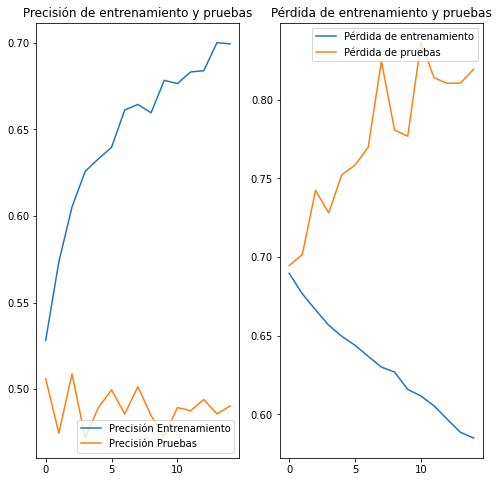

In [7]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1, 2, 2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [8]:
import pandas as pd
column_values = ['precision de train',
                 'precision de pruebas',
                 'perdida de train',
                 'perdida de pruebas']
array= list(zip(acc,val_acc,loss,val_loss))
df = pd.DataFrame(data = array,columns=column_values)
df


,precision de train,precision de pruebas,perdida de train,perdida de pruebas
0,0.528118,0.506024,0.689570,0.694530
1,0.573478,0.474513,0.676552,0.701541
2,0.605184,0.508804,0.666387,0.742350
3,0.625781,0.471733,0.656616,0.727973
4,0.632955,0.489342,0.649521,0.752269
5,0.639667,0.499537,0.643865,0.758311
6,0.661190,0.485635,0.636815,0.769723
7,0.664430,0.501390,0.630024,0.824365
8,0.659570,0.484708,0.626849,0.780555
9,0.678315,0.472660,0.615825,0.776686


In [9]:
df.describe()

,precision de train,precision de pruebas,perdida de train,perdida de pruebas
count,15.000000,15.000000,15.000000,15.000000
mean,0.647443,0.489404,0.631958,0.774546
std,0.048347,0.011305,0.031974,0.044831
min,0.528118,0.471733,0.584938,0.694530
25%,0.629368,0.485171,0.608512,0.747310
50%,0.661190,0.489342,0.630024,0.776686
75%,0.680745,0.496756,0.653068,0.812166
max,0.700069,0.508804,0.689570,0.836109
